Load data from sources

In [22]:
import pandas as pd

# Load CSV files
nba_player_stats = pd.read_csv('NBA Player Stats(1950 - 2022).csv')
nba_players_data = pd.read_csv('nbaplayersdraft.csv')


print("NBA Player Stats Dataset:")
print(nba_player_stats.head())

print("\nNBA Players Draft Dataset:")
print(nba_players_data.head())

NBA Player Stats Dataset:
   Unnamed: 0.1  Unnamed: 0  Season           Player  Pos   Age   Tm     G  \
0             0           0    1950  Curly Armstrong  G-F  31.0  FTW  63.0   
1             1           1    1950     Cliff Barker   SG  29.0  INO  49.0   
2             2           2    1950    Leo Barnhorst   SF  25.0  CHS  67.0   
3             3           3    1950       Ed Bartels    F  24.0  TOT  15.0   
4             4           4    1950       Ed Bartels    F  24.0  DNN  13.0   

   GS  MP  ...    FT%  ORB  DRB  TRB    AST  STL  BLK  TOV     PF    PTS  
0 NaN NaN  ...  0.705  NaN  NaN  NaN  176.0  NaN  NaN  NaN  217.0  458.0  
1 NaN NaN  ...  0.708  NaN  NaN  NaN  109.0  NaN  NaN  NaN   99.0  279.0  
2 NaN NaN  ...  0.698  NaN  NaN  NaN  140.0  NaN  NaN  NaN  192.0  438.0  
3 NaN NaN  ...  0.559  NaN  NaN  NaN   20.0  NaN  NaN  NaN   29.0   63.0  
4 NaN NaN  ...  0.548  NaN  NaN  NaN   20.0  NaN  NaN  NaN   27.0   59.0  

[5 rows x 32 columns]

NBA Players Draft Dataset:
   i

Clean both datasets

In [23]:

import pandas as pd

# Load the CSV files
nba_player_stats = pd.read_csv('NBA Player Stats(1950 - 2022).csv')
nba_players_draft = pd.read_csv('nbaplayersdraft.csv')

# Filter the draft dataset for players drafted after 1989
nba_players_data_clean = nba_players_data[(nba_players_data['year'] >= 1989)]

# Merge the player stats data with the cleaned draft data by the 'Player' column
nba_player_stats_clean = nba_player_stats[nba_player_stats['Player'].isin(nba_players_data_clean['player'])]

nba_players_data = nba_players_data.rename(columns={'player': 'Player'})


print("Cleaned NBA Player Stats Dataset (Only Drafted After 1989):")
print(nba_player_stats_clean.head())
print(nba_players_data.head())


Cleaned NBA Player Stats Dataset (Only Drafted After 1989):
      Unnamed: 0.1  Unnamed: 0  Season       Player Pos   Age   Tm     G  GS  \
563            582          64    1952  George King  PG  23.0  SYR  66.0 NaN   
704            728          69    1953  George King  PG  24.0  SYR  71.0 NaN   
854            884          57    1954  George King  PG  25.0  SYR  72.0 NaN   
992           1027          60    1955  George King  PG  26.0  SYR  67.0 NaN   
1116          1156          54    1956  George King  PG  27.0  SYR  72.0 NaN   

          MP  ...    FT%  ORB  DRB    TRB    AST  STL  BLK  TOV     PF    PTS  
563   1889.0  ...  0.712  NaN  NaN  274.0  244.0  NaN  NaN  NaN  199.0  658.0  
704   2519.0  ...  0.643  NaN  NaN  281.0  364.0  NaN  NaN  NaN  244.0  794.0  
854   2370.0  ...  0.627  NaN  NaN  268.0  272.0  NaN  NaN  NaN  179.0  817.0  
992   2015.0  ...  0.611  NaN  NaN  227.0  331.0  NaN  NaN  NaN  148.0  596.0  
1116  2343.0  ...  0.640  NaN  NaN  250.0  410.0  NaN  NaN 

In [24]:
pip install pymysql


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Load cleaned datasets into MySQL database

In [25]:
import os
import pandas as pd
from sqlalchemy import create_engine
import pymysql


# Load the CSV files
nba_player_stats = pd.read_csv('NBA Player Stats(1950 - 2022).csv')
nba_players_draft = pd.read_csv('nbaplayersdraft.csv')

# Filter the draft dataset for players drafted after 1989
nba_players_draft_clean = nba_players_draft[nba_players_draft['year'] >= 1989]

# Clean the player stats dataset to only include players who were drafted after 1989
nba_player_stats_clean = nba_player_stats[nba_player_stats['Player'].isin(nba_players_draft_clean['player'])]


nba_players_draft_clean = nba_players_draft_clean.rename(columns={'player': 'Player'})

# Database connection details
host_name = "ds2002.org" 
host_ip = "ds2002.org"
port = "3306"

user_id = "nnt6qd"
pwd = "nnt6qd!"
db_name = "nnt6qd"


# Create a SQLAlchemy engine to connect to the MySQL database
engine = create_engine(f"mysql+pymysql://{user_id}:{pwd}@{host_name}/{db_name}")

# Load the player stats dataset into a MySQL table
nba_player_stats_clean.to_sql('player_stats', engine, if_exists='replace', index=False)

# Load the cleaned draft dataset into a MySQL table
nba_players_draft_clean.to_sql('players_draft', con=engine, if_exists='replace', index=False)

print("Data has been successfully loaded into the MySQL database!")


Data has been successfully loaded into the MySQL database!


Create a merged dataset

In [30]:
query = """
SELECT *
FROM player_stats AS ps
JOIN players_draft AS pd
ON ps.Player = pd.Player
"""

merged_data = pd.read_sql(query, engine)

output_file_path = "merged_nba_data.csv"
# merged_data.to_csv(output_file_path, index=False)



C:\Users\tiffa\AppData\Local\Temp\ipykernel_25932\1651453757.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="overall_pick", y="points_per_game", ci=None, palette=custom_palette)
C:\Users\tiffa\AppData\Local\Temp\ipykernel_25932\1651453757.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="overall_pick", y="points_per_game", ci=None, palette=custom_palette)
C:\Users\tiffa\AppData\Local\Temp\ipykernel_25932\1651453757.py:13: UserWarning: 
The palette list has fewer values (3) than needed (60) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df, x="overall_pick", y="points_per_game", ci=None, palette=custom_palette)


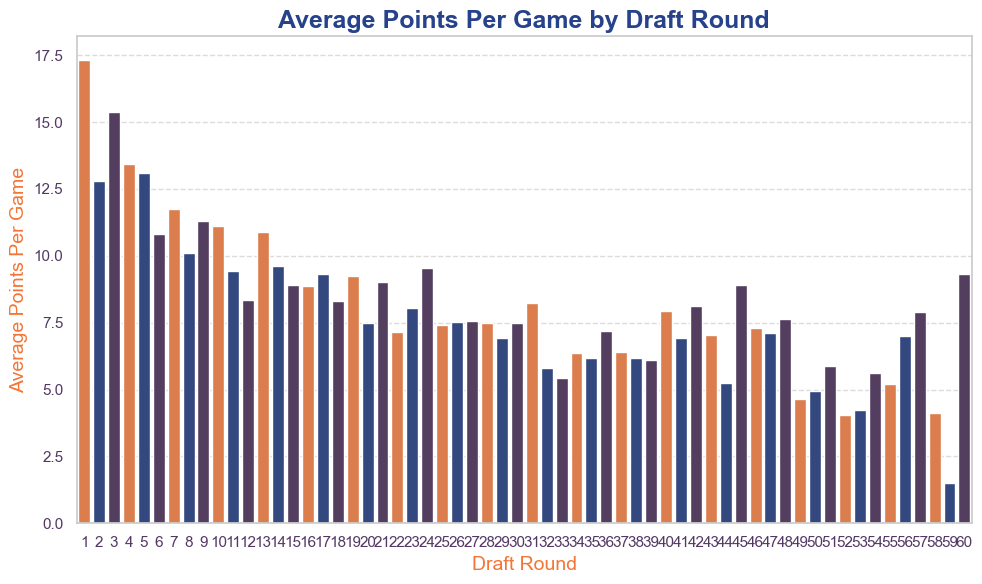

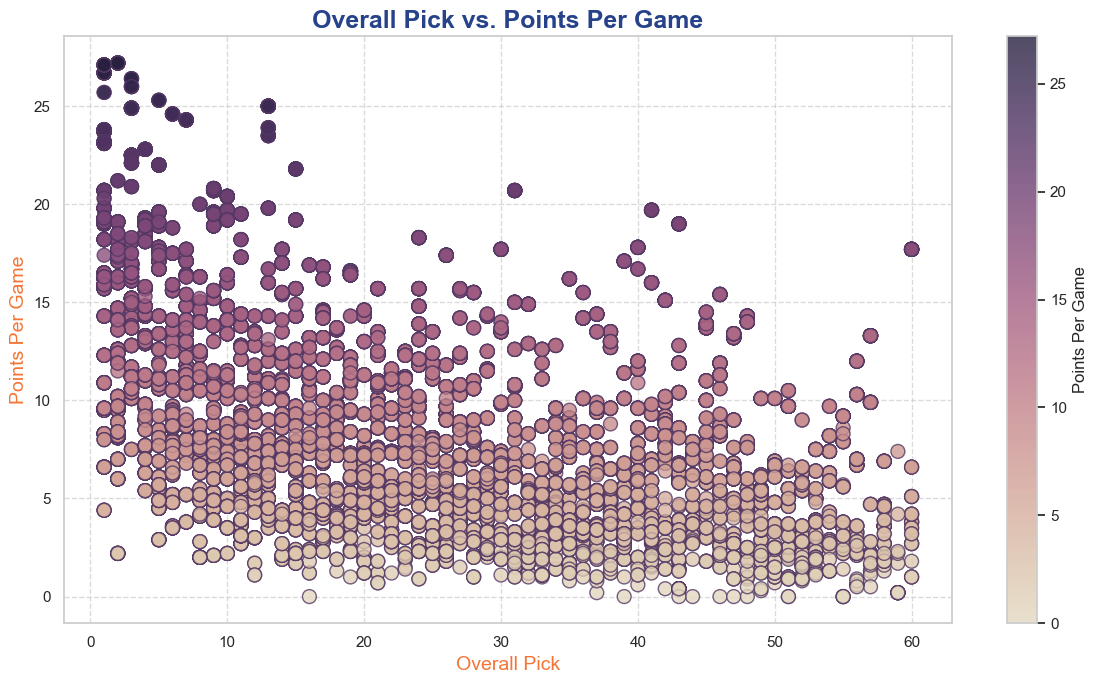

C:\Users\tiffa\AppData\Local\Temp\ipykernel_25932\1651453757.py:44: UserWarning: 
The palette list has fewer values (3) than needed (60) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df, x="years_active", y="win_shares", hue="overall_pick", palette=custom_palette, marker="o")
C:\Users\tiffa\AppData\Local\Temp\ipykernel_25932\1651453757.py:50: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


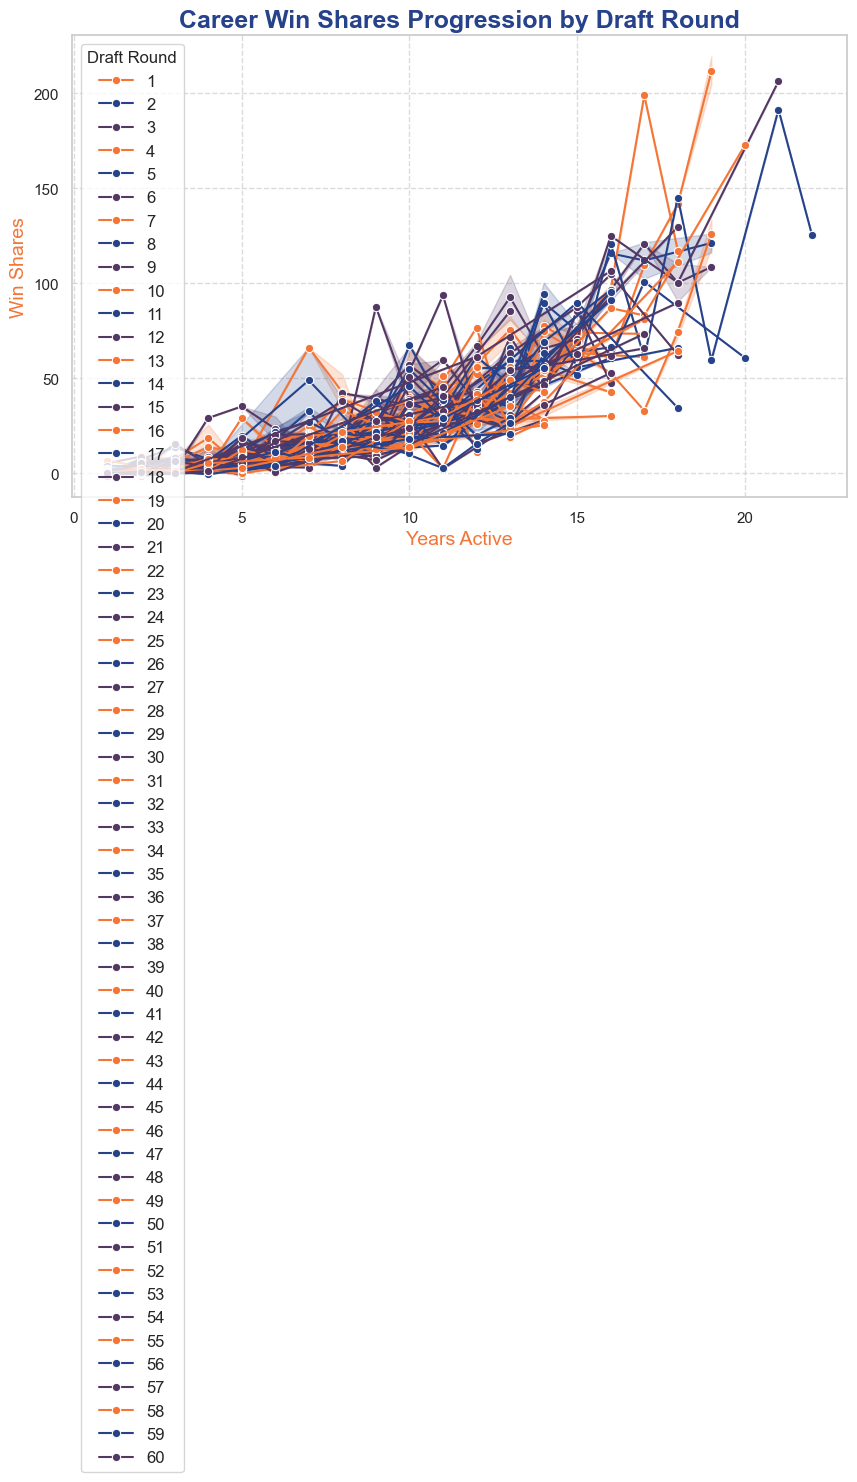

ValueError: Could not interpret value `draft_round` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns




custom_palette = ["#f47536", "#26428b", "#543864"] 
sns.set_theme(style="whitegrid")
sns.set_palette(custom_palette)

# Bar Plot: Average points by draft round
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="overall_pick", y="points_per_game", ci=None, palette=custom_palette)
plt.title("Average Points Per Game by Draft Round", fontsize=18, fontweight='bold', color="#26428b")
plt.xlabel("Draft Round", fontsize=14, color="#f47536")
plt.ylabel("Average Points Per Game", fontsize=14, color="#f47536")
plt.xticks(color="#543864")
plt.yticks(color="#543864")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Scatter Plot: Overall pick vs. Points per game with colorbar
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    x=df["overall_pick"], 
    y=df["points_per_game"], 
    c=df["points_per_game"], 
    cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), 
    s=100, 
    alpha=0.8, 
    edgecolors="#543864"
)
plt.colorbar(scatter, label="Points Per Game")
plt.title("Overall Pick vs. Points Per Game", fontsize=18, fontweight='bold', color="#26428b")
plt.xlabel("Overall Pick", fontsize=14, color="#f47536")
plt.ylabel("Points Per Game", fontsize=14, color="#f47536")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Line Plot: Career progression by draft round
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="years_active", y="win_shares", hue="overall_pick", palette=custom_palette, marker="o")
plt.title("Career Win Shares Progression by Draft Round", fontsize=18, fontweight='bold', color="#26428b")
plt.xlabel("Years Active", fontsize=14, color="#f47536")
plt.ylabel("Win Shares", fontsize=14, color="#f47536")
plt.legend(title="Draft Round", loc="upper left", fontsize=12)
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Box Plot: Distribution of win shares by draft round
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="draft_round", y="win_shares", palette=custom_palette)
plt.title("Win Shares Distribution by Draft Round", fontsize=18, fontweight='bold', color="#26428b")
plt.xlabel("Draft Round", fontsize=14, color="#f47536")
plt.ylabel("Win Shares", fontsize=14, color="#f47536")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\tiffa\AppData\Local\Temp\ipykernel_31364\2118625777.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df, y="college", hue="draft_round", palette=custom_palette, order=df['college'].value_counts().index[:10])


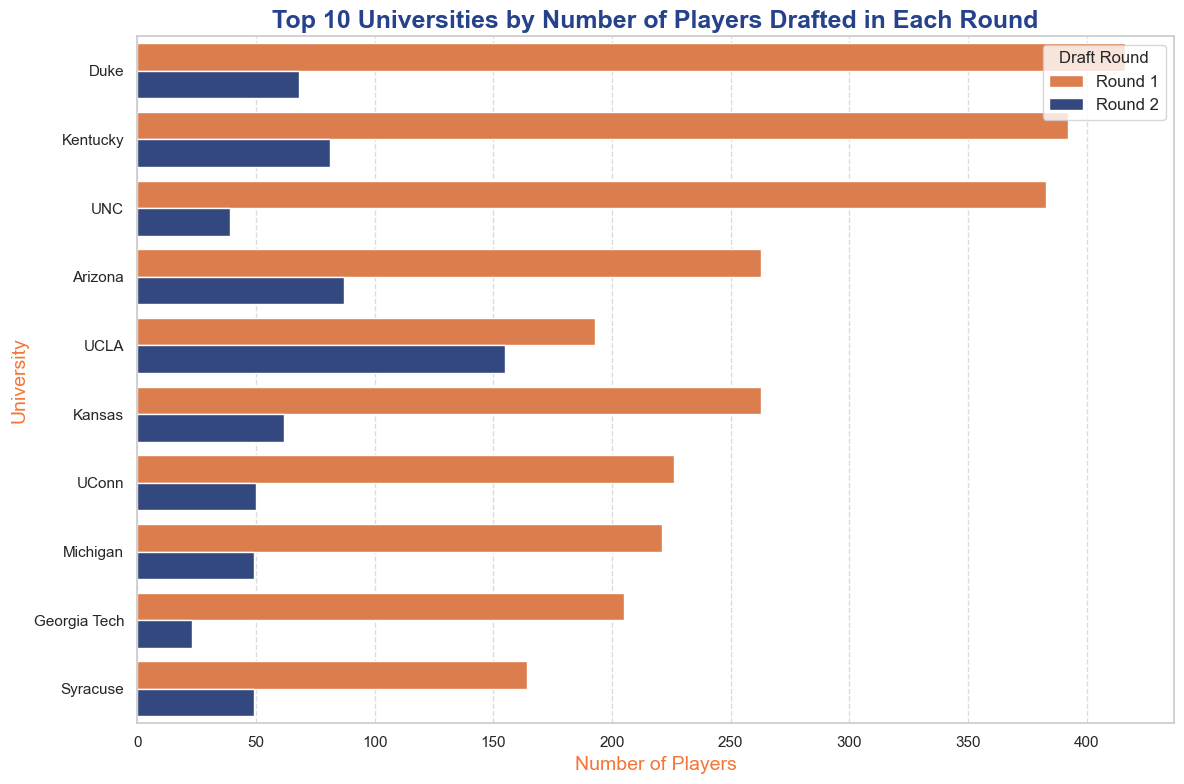

In [ ]:
# Count Plot: Number of players drafted from each university by draft round
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y="college", hue="draft_round", palette=custom_palette, order=df['college'].value_counts().index[:10])
plt.title("Top 10 Universities by Number of Players Drafted in Each Round", fontsize=18, fontweight='bold', color="#26428b")
plt.xlabel("Number of Players", fontsize=14, color="#f47536")
plt.ylabel("University", fontsize=14, color="#f47536")
plt.legend(title="Draft Round", loc="upper right", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\tiffa\AppData\Local\Temp\ipykernel_31364\666529144.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\tiffa\AppData\Local\Temp\ipykernel_31364\666529144.py:31: UserWarning: 
The palette list has fewer values (3) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


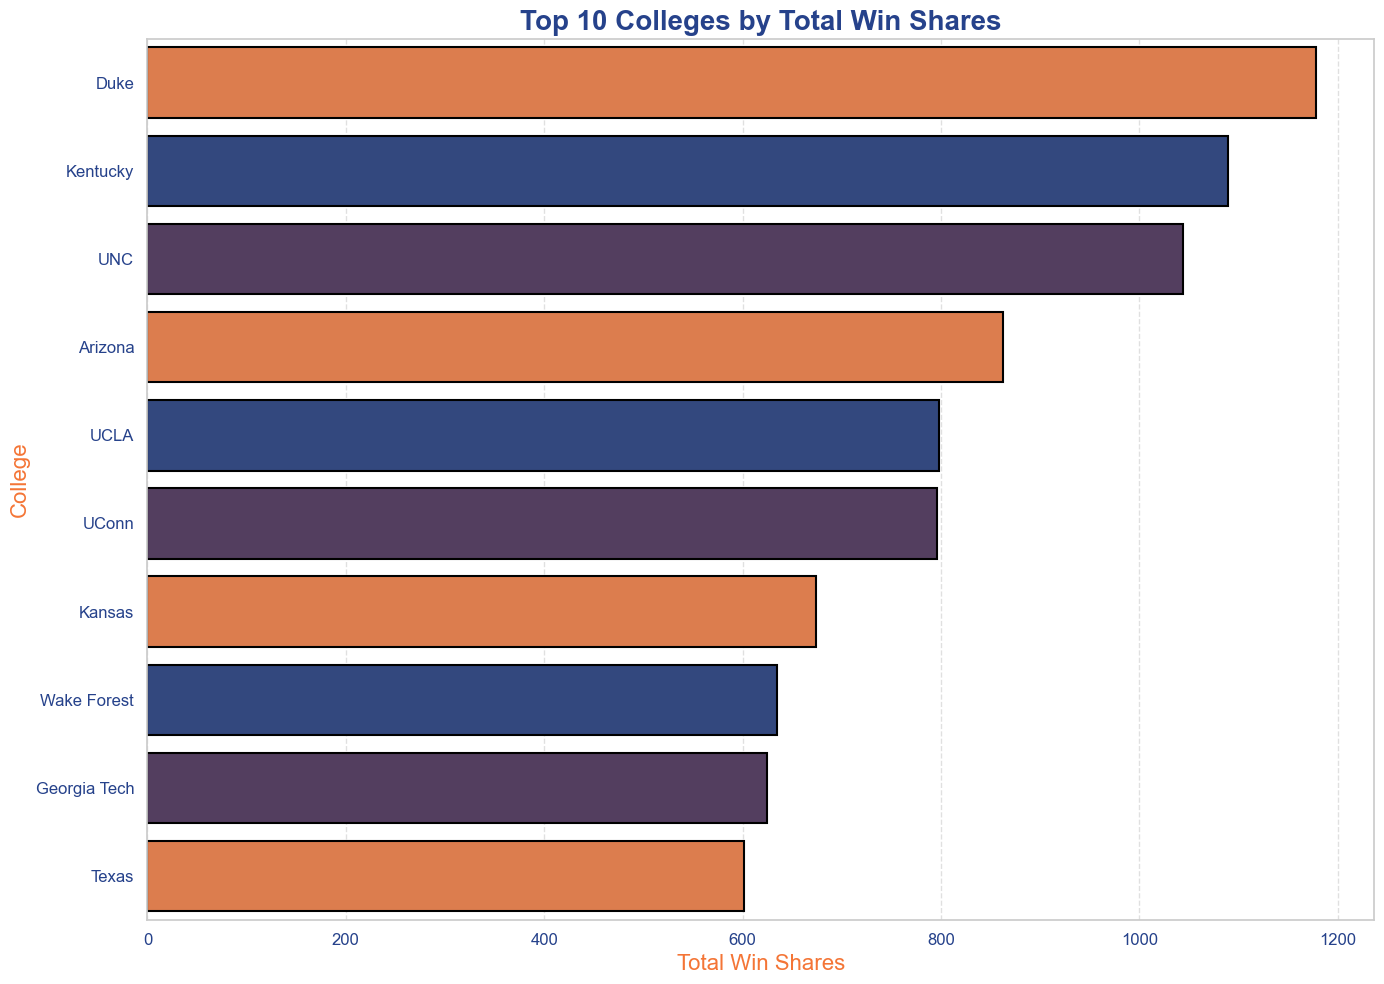

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

average_ws = df.groupby("Player", as_index=False).agg(
    win_shares=('win_shares', 'mean'),
    college=('college', 'first')
)


average_ws = average_ws[average_ws['college'] != 'No College']


college_stats = (
    average_ws.groupby('college')
    .agg(total_players=('Player', 'count'), total_win_shares=('win_shares', 'sum'))
    .reset_index()
    .sort_values(by='total_win_shares', ascending=False)
)

# Select top 10 colleges based on total win shares
top_colleges = college_stats.head(10)


custom_palette = ["#f47536","#26428b", "#543864"]


plt.figure(figsize=(14, 10))

# Create the barplot
sns.barplot(
    x='total_win_shares', 
    y='college', 
    data=top_colleges, 
    palette=custom_palette, 
    edgecolor='black', 
    linewidth=1.5, 
)

# Add labels and title
plt.title("Top 10 Colleges by Total Win Shares", fontsize=20, fontweight='bold', color="#26428b")
plt.xlabel("Total Win Shares", fontsize=16, color="#f47536")
plt.ylabel("College", fontsize=16, color="#f47536")


plt.grid(axis="x", linestyle="--", alpha=0.6)


plt.xticks(fontsize=12, color="#26428b")
plt.yticks(fontsize=12, color="#26428b")


plt.gcf().set_facecolor('white')


plt.tight_layout()


plt.show()


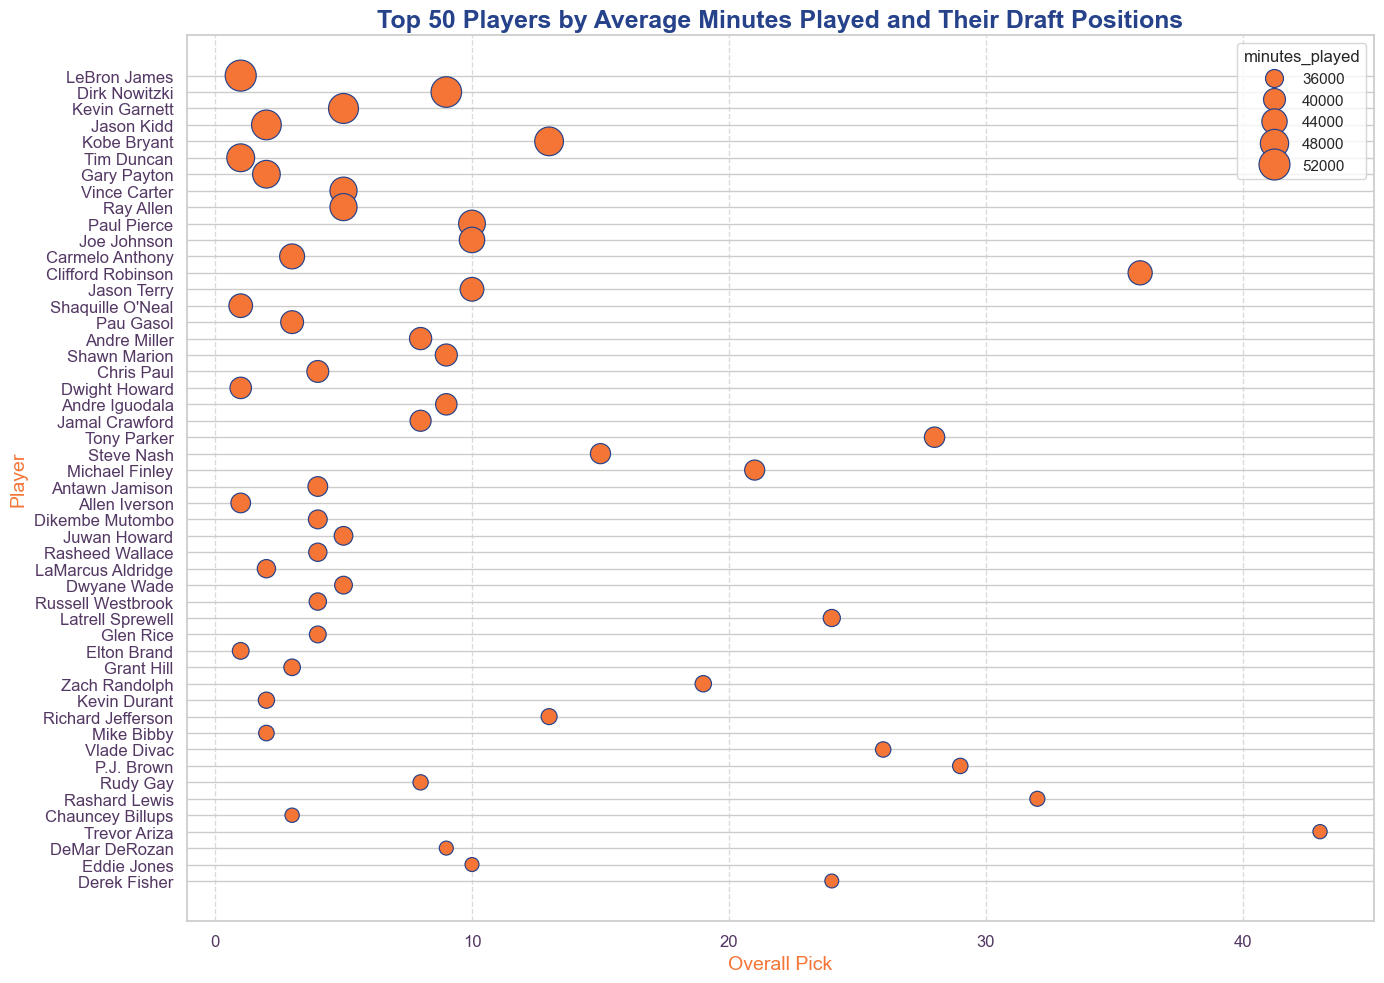

In [ ]:
# Sort players by average minutes
top_50_with_draft = top_50_with_draft.sort_values("minutes_played", ascending=False)

# Scatter Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=top_50_with_draft, 
    x="overall_pick", 
    y="Player", 
    size="minutes_played", 
    sizes=(100, 500), 
    color="#f47536",
    edgecolor="#26428b"
)

# Title and labels
plt.title("Top 50 Players by Average Minutes Played and Their Draft Positions", fontsize=18, fontweight='bold', color="#26428b")
plt.xlabel("Overall Pick", fontsize=14, color="#f47536")
plt.ylabel("Player", fontsize=14, color="#f47536")


plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.xticks(fontsize=12, color="#543864")
plt.yticks(fontsize=12, color="#543864")
plt.tight_layout()
plt.show()



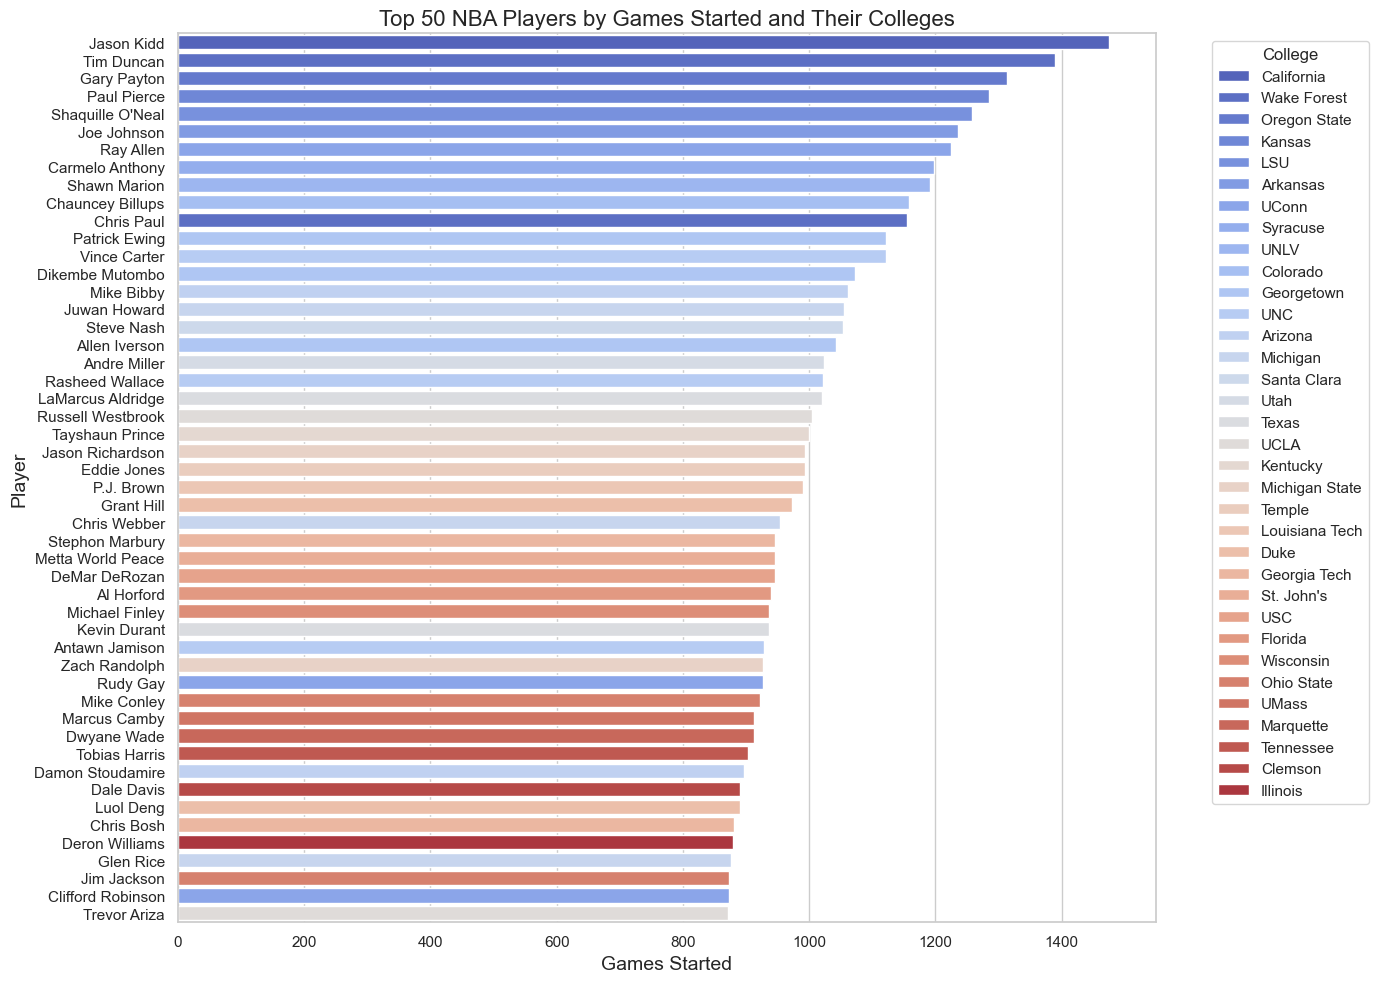

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("merged_nba_data.csv")

unique_players = df.groupby(["Player", "college"], as_index=False)["GS"].sum()

# Select top 50 players by games started
top_50_players = unique_players.sort_values(by="GS", ascending=False).head(50)

# Create the bar graph
plt.figure(figsize=(14, 10))
sns.barplot(
    data=top_50_players, 
    x="GS", 
    y="Player", 
    hue="college", 
    dodge=False, 
    palette="coolwarm"
)

# Add labels and title
plt.xlabel("Games Started", fontsize=14)
plt.ylabel("Player", fontsize=14)
plt.title("Top 50 NBA Players by Games Started and Their Colleges", fontsize=16)
plt.legend(title="College", bbox_to_anchor=(1.05, 1), loc="upper left")


plt.tight_layout()
plt.show()
